In [143]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import cv2
from collections import Counter
from colorthief import ColorThief
import seaborn as sns
from matplotlib.colors import rgb2hex
%matplotlib inline

In [30]:
cv_cat = cv2.imread('images/cats.png')
cat = misc.imread('images/cats.png')

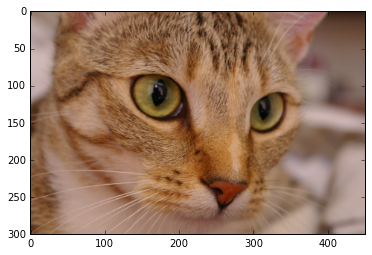

In [33]:
plt.imshow(cat)

In [12]:
r, g, b = [], [], []

In [18]:
cat.shape

(300, 451, 3)

In [105]:
def rgb_hist(image):
    red = image[:,:,0].flatten()
    green = image[:,:,1].flatten()
    blue = image[:,:,2].flatten()
    return Counter(red), Counter(green), Counter(blue)

In [106]:
r,g,b = rgb_hist(cat)

In [108]:
r_hist = {k: r[k] for k in range(256)}
g_hist = {k: g[k] for k in range(256)}
b_hist = {k: b[k] for k in range(256)}

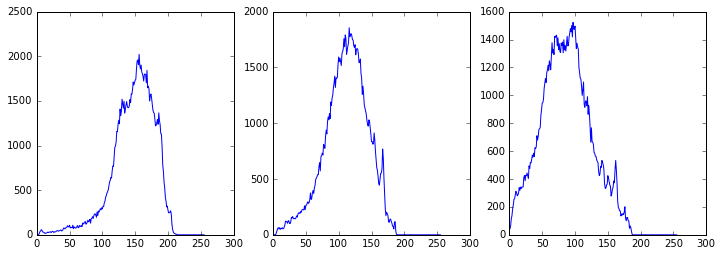

In [110]:
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
plt.plot(xrange(256), r_hist.values())
plt.subplot(1,3,2)
plt.plot(xrange(256), g_hist.values())
plt.subplot(1,3,3)
plt.plot(xrange(256), b_hist.values())

In [121]:
pixels = cat[:].flatten()

In [202]:
small_pixels = cat.reshape(135300, 3)

In [206]:
tuple(small_pixels[0])

(143, 120, 104)

In [209]:
pix = []
for i in xrange(len(small_pixels)):
    pix.append(tuple(small_pixels[i]))
col = Counter(pix)

In [211]:
col.most_common()

[((191, 167, 163), 170),
 ((187, 155, 142), 131),
 ((190, 167, 161), 129),
 ((188, 156, 143), 121),
 ((186, 154, 141), 115),
 ((190, 166, 162), 111),
 ((192, 168, 164), 108),
 ((189, 168, 163), 104),
 ((191, 168, 162), 97),
 ((188, 165, 159), 85),
 ((190, 169, 164), 81),
 ((187, 164, 158), 78),
 ((188, 168, 161), 77),
 ((185, 153, 140), 77),
 ((130, 108, 97), 74),
 ((132, 110, 99), 73),
 ((188, 167, 162), 73),
 ((186, 154, 139), 72),
 ((189, 169, 162), 71),
 ((189, 166, 160), 69),
 ((189, 165, 161), 67),
 ((131, 108, 100), 66),
 ((205, 186, 182), 65),
 ((186, 166, 159), 64),
 ((189, 157, 144), 64),
 ((186, 163, 157), 63),
 ((187, 167, 160), 60),
 ((130, 107, 99), 58),
 ((185, 153, 138), 57),
 ((193, 169, 165), 57),
 ((133, 111, 100), 55),
 ((179, 158, 153), 53),
 ((131, 109, 98), 51),
 ((132, 109, 101), 51),
 ((181, 148, 133), 51),
 ((184, 152, 139), 51),
 ((188, 164, 160), 51),
 ((184, 163, 158), 50),
 ((186, 165, 162), 50),
 ((178, 157, 152), 49),
 ((205, 185, 184), 49),
 ((183, 160,

In [128]:
pixels = cat.reshape(135300, 3)

In [134]:
colors = Counter(pixels)

TypeError: unhashable type: 'numpy.ndarray'

In [191]:
color_thief = ColorThief('images/cats.png')
# get the dominant color
dominant_color = color_thief.get_color(quality=1)
# build a color palette
palette = color_thief.get_palette(color_count=6)

(0.0, 1.0, 0.0, 1.0)

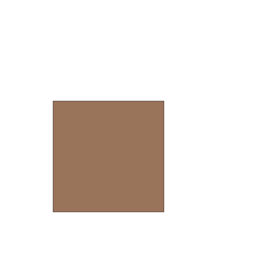

In [176]:
from colorutils import Color
import matplotlib.patches as patches

d = Color(dominant_color)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
ax1.add_patch(
    patches.Rectangle(
        (0.1, 0.1),   # (x,y)
        0.5,          # width
        0.5,          # height
        facecolor=d.hex,
)
    )

#fig1.patch.set_visible(False)
ax1.axis('off')

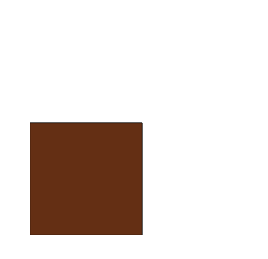

In [189]:
from colorutils import Color
import matplotlib.patches as patches

fig = plt.figure()
for i, col in enumerate(palette):
    c = Color(col)
    ax = fig.add_subplot(111, aspect='equal')
    ax.add_patch(
        patches.Rectangle(
            (0.0, 0.0),   # (x,y)
            0.5,          # width
            0.5,          # height
            facecolor=c.hex,
    )
        )

    #fig1.patch.set_visible(False)
    ax.axis('off')

In [158]:

import sys

if sys.version_info < (3, 0):
    from urllib2 import urlopen
else:
    from urllib.request import urlopen

import io

from colorthief import ColorThief


fd = urlopen('http://lokeshdhakar.com/projects/color-thief/img/photo1.jpg')
f = io.BytesIO(fd.read())
color_thief = ColorThief(f)
print(color_thief.get_color(quality=1))
print(color_thief.get_palette(quality=1))

(124, 192, 197)
[(57, 39, 29), (214, 194, 136), (109, 207, 225), (134, 133, 65), (42, 125, 149), (134, 129, 118), (156, 179, 128), (167, 199, 223), (213, 76, 7)]


In [171]:
pal = sns.color_palette(d.hex)
sns.palplot(pal)

ValueError: #99745b is not a valid palette name

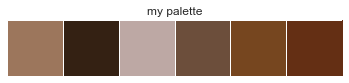

In [196]:
my_cols = []
for col in palette:
    c = Color(col)
    my_cols.append(c.hex)
fig = plt.figure(figsize=(8, 6))
sns.palplot(sns.color_palette(my_cols))
plt.title('my palette')